In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd .read_csv('cdata.csv')
df.head()

,x,y,cluster
0,2.1364,0.8369,1
1,7.4096,-1.4137,3
2,5.0996,1.1552,0
3,7.8149,-1.0186,3
4,1.8925,1.2714,1


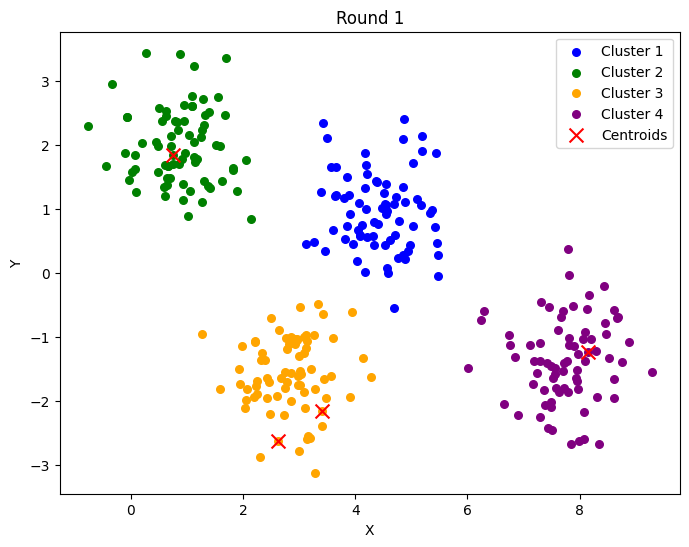

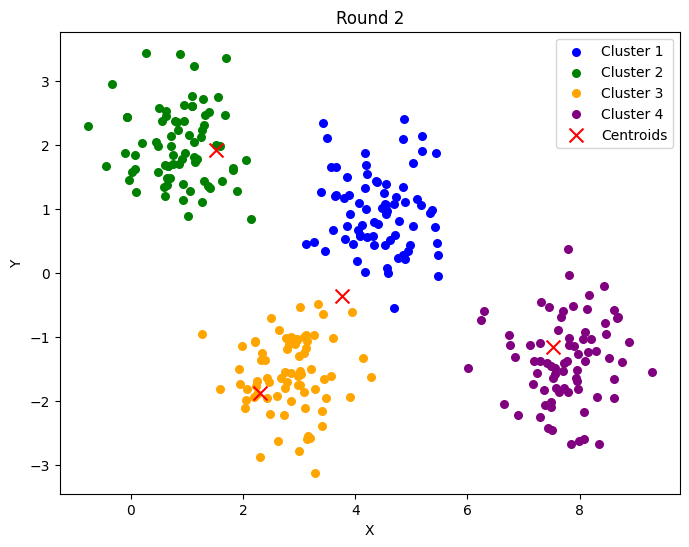

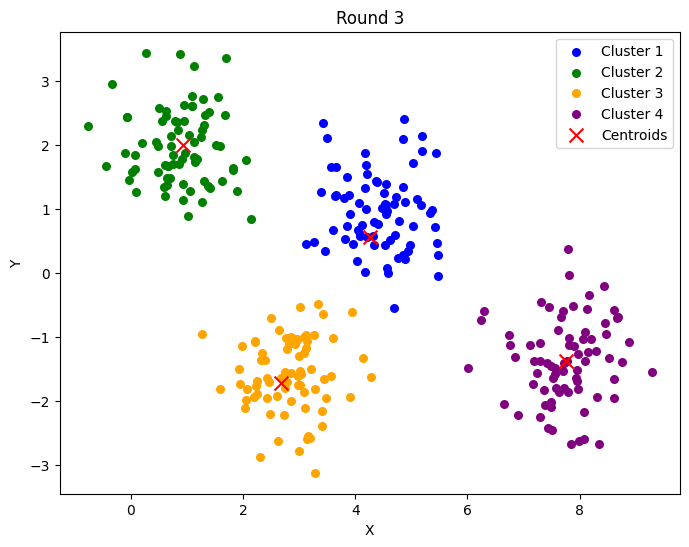

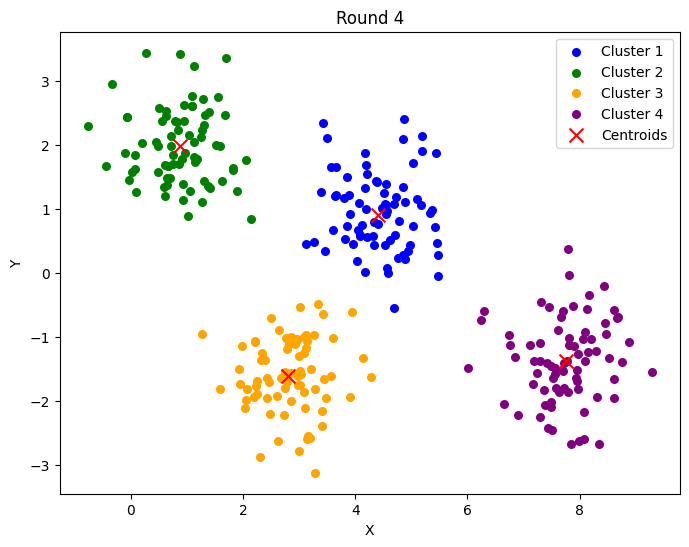

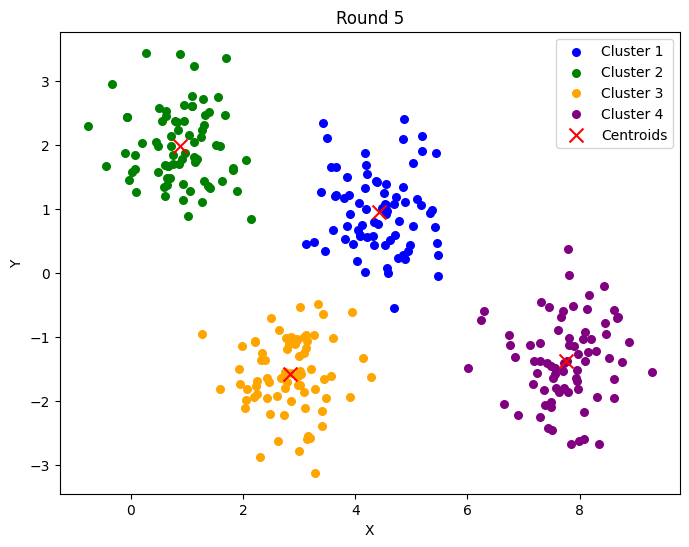

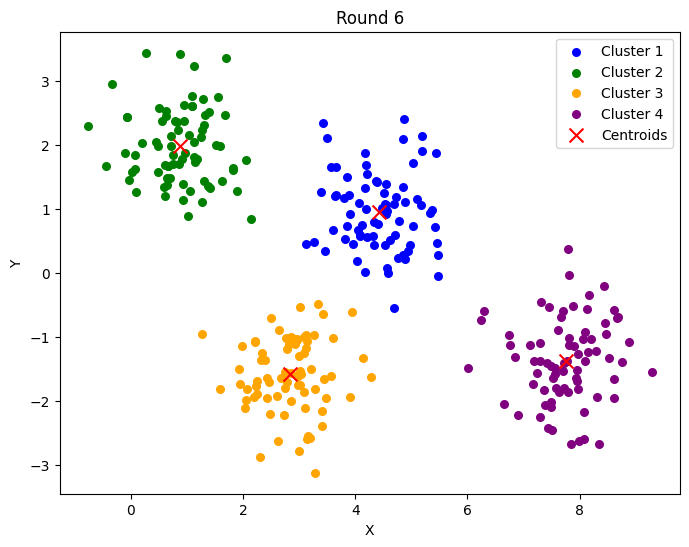

In [3]:
points = df[['x', 'y']].values
np.random.seed(123)
k = 4  #群數
max_iter = 100  #試驗次數

centroids = points[np.random.choice(points.shape[0], k, replace=False)]

#euclidean formula
def euclidean(a,b):
    distance = np.sqrt(np.sum((a-b)**2))
    return distance

# 儲存每次迭代的質心
centroid_history = [centroids.copy()]


for iteration in range(max_iter):
    #計算每個點到各個質心的距離
    distances = np.array([[euclidean(x, centroid) for centroid in centroids] for x in points])
    
    #分配到最近的質心
    clusters = np.argmin(distances, axis=1)
    
    #更新質心位置
    new_centroids = np.array([points[clusters == i].mean(axis=0) for i in range(k)])
    
    #統一紀錄，之後再一次畫圖
    centroid_history.append(new_centroids.copy())
    
    # 若質心不再改變，則停止
    if np.all(centroids == new_centroids):
        break
    centroids = new_centroids


colors = ['blue', 'green', 'orange', 'purple']
for iteration, centroids in enumerate(centroid_history):
    plt.figure(figsize=(8, 6))
    
    for i in range(k):
        cluster_points = points[clusters == i]# 畫出每個簇群的點
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=30, color=colors[i], label=f'Cluster {i+1}')
    
    # 畫出該輪的質心
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
    
    plt.title(f'Round {iteration+1}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show() 

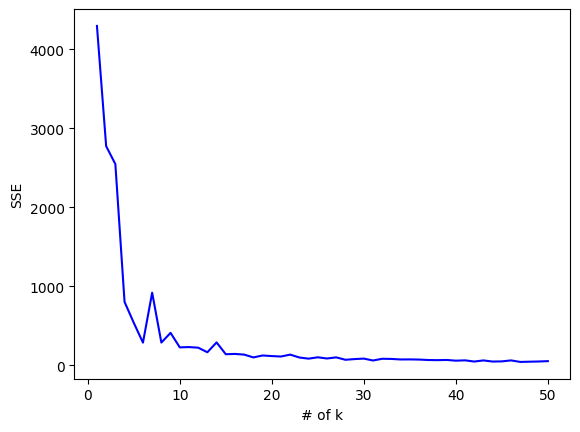

In [15]:
points = df[['x', 'y']].values
np.random.seed(123)

#euclidean formula
def euclidean(a,b):
    distance = np.sqrt(np.sum((a-b)**2))
    return distance


# 儲存每次迭代的質心
centroid_history = [centroids.copy()]
SSE =[]


for k in range(1,51): #題目要求試50遍

    # 依據群數產生對應數量中心點
    centroids = points[np.random.choice(points.shape[0], k, replace=False)]

    # 計算各點到各質心的距離
    distances = np.array([[euclidean(x, centroid) for centroid in centroids] for x in points])
    
    #分配到最近的質心
    clusters = np.argmin(distances, axis=1)

    # 計算 SSE
    current_sse = 0  # 當前迭代的 SSE
    for i in range(len(points)):
        centroid = centroids[clusters[i]]  # 找到該點對應的質心
        current_sse += euclidean(points[i], centroid) ** 2  # 計算該點到質心的距離平方並累加
    
    SSE.append(current_sse)  # 將當前迭代的 SSE 加入到列表中
    
#繪製曲線圖
x = np.arange(1,51,1)
plt.plot(x,SSE,'b')
plt.xlabel('# of k')
plt.ylabel('SSE')
plt.show()

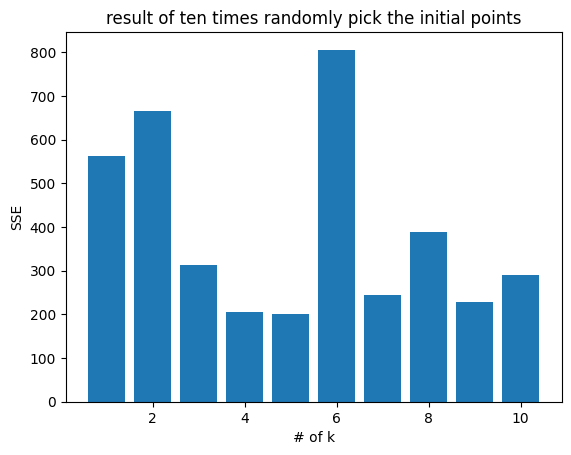

In [18]:
points = df[['x', 'y']].values
np.random.seed(123)
k = 10  #群數
max_iter = 10  #試驗次數

centroids = points[np.random.choice(points.shape[0], k, replace=False)]

#euclidean formula
def euclidean(a,b):
    distance = np.sqrt(np.sum((a-b)**2))
    return distance


SSE =[]


for iteration in range(max_iter):

    #隨機初始化中心點
    centroids = points[np.random.choice(points.shape[0], k, replace=False)]

    #計算各點到各質心的距離
    distances = np.array([[euclidean(x, centroid) for centroid in centroids] for x in points])
    
    #分配到最近的質心
    clusters = np.argmin(distances, axis=1)

    # 計算 SSE
    current_sse = 0  # 當前迭代的 SSE
    for i in range(len(points)):
        centroid = centroids[clusters[i]]  # 找到該點對應的質心
        current_sse += euclidean(points[i], centroid) ** 2  # 計算該點到質心的距離平方並累加
    
    SSE.append(current_sse)  # 將當前迭代的 SSE 加入到列表中
    

#繪製曲線圖
x = np.arange(1,11,1)
plt.bar(x,SSE)
plt.xlabel('# of k')
plt.ylabel('SSE')
plt.title('result of ten times randomly pick the initial points')
plt.show()